In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sys, os
import warnings

In [2]:
arquivo1 = '.\\Simulation Files\\20-Jun-2025 08.53.24.csv' #"comment 1" data
arquivo2 = '.\\Simulation Files\\20-Jun-2025 08.58.52.csv' #"comment 2" data
arquivo3 = '.\\Simulation Files\\20-Jun-2025 10.01.20.csv' #"comment 3" data file

arquivo = [arquivo1, arquivo2, arquivo3]

In [3]:
for i in range(0,3,1):
    with open(arquivo[i], 'r') as f:
        for linha in f:
            if linha.startswith('wavelength,'):
                wavelengths = [float(v) for v in linha.strip().split(',')[1:]]
            elif linha.startswith('channel_1,'):
                channel_1 = [float(v) for v in linha.strip().split(',')[1:]]
            elif linha.startswith('channel_2,'):
                channel_2 = [float(v) for v in linha.strip().split(',')[1:]]
            elif linha.startswith('channel_3,'):
                channel_3 = [float(v) for v in linha.strip().split(',')[1:]]
    
    if i == 0:
        df1 = pd.DataFrame({
        'wavelength': wavelengths,
        'channel_1': channel_1,
        'channel_2': channel_2,
        'channel_3': channel_3
            })
    elif i == 1:
        df2 = pd.DataFrame({
        'wavelength': wavelengths,
        'channel_1': channel_1,
        'channel_2': channel_2,
        'channel_3': channel_3
        })
    elif i == 2:
        df3 = pd.DataFrame({
        'wavelength': wavelengths,
        'channel_1': channel_1,
        'channel_2': channel_2,
        'channel_3': channel_3
        })

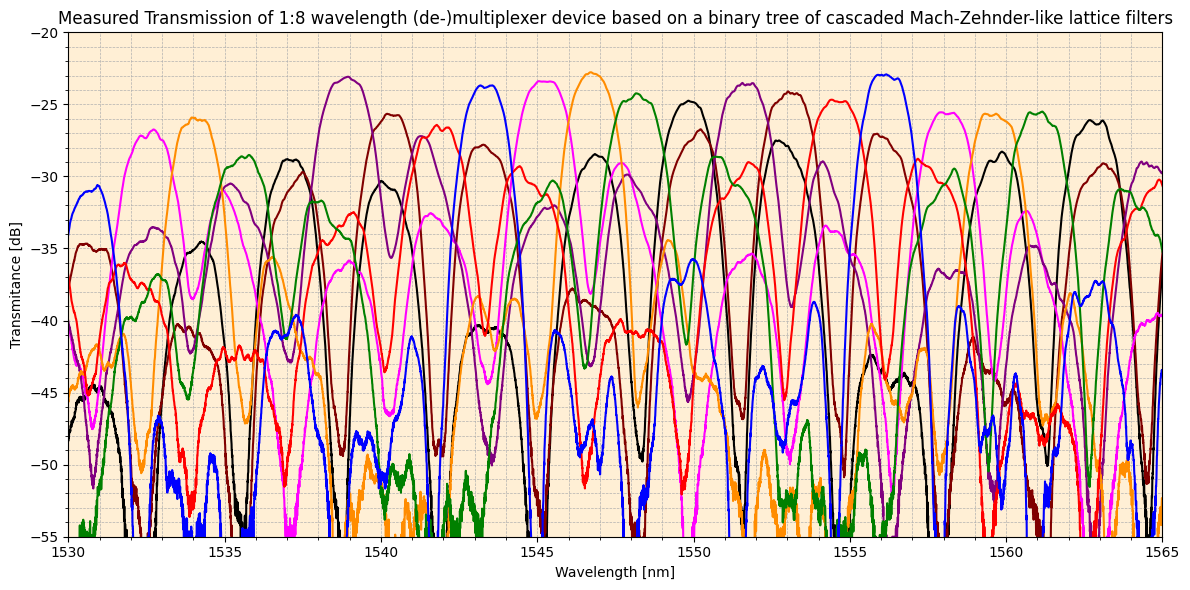

In [4]:
plt.figure(figsize=(12,6))
#plt.figure(facecolor='papayawhip')
plt.plot(df1['wavelength'],df1['channel_1'], color='black')
plt.plot(df1['wavelength'],df1['channel_2'],color='maroon')
#plt.plot(df1['wavelength'],df1['channel_3'], color='blue') # repeated

plt.plot(df2['wavelength'],df2['channel_1'], color='magenta')
plt.plot(df2['wavelength'],df2['channel_2'], color='purple')
plt.plot(df2['wavelength'],df2['channel_3'], color='darkorange')
#out 123
plt.plot(df3['wavelength'],df3['channel_1'], color='red')
plt.plot(df3['wavelength'],df3['channel_2'], color='green')
plt.plot(df3['wavelength'],df3['channel_3'], color = 'blue')
plt.grid()
plt.title(rf'Measured Transmission of 1:8 wavelength (de-)multiplexer device based on a binary tree of cascaded Mach-Zehnder-like lattice filters')
plt.ylim(-55,-20)
plt.xlim(1530,1565)
plt.xlabel('Wavelength [nm]')
plt.ylabel('Transmitance [dB]')
plt.minorticks_on()
plt.tight_layout()
plt.grid(which='both', axis='both', linestyle='--', linewidth=0.5)
ax = plt.gca()
ax.set_facecolor('papayawhip')
plt.savefig('.\\Images\\Measured results')

In [22]:
sys.path.append('C:\\Program Files\\Lumerical\\v242\\api\\python')
sys.path.append('C:\\Program Files\\Lumerical\\v242\\api\\python\\lumapi.py')
warnings.filterwarnings("ignore", category=SyntaxWarning)
import lumapi
icApi = lumapi.INTERCONNECT()

In [14]:
#units
nm = 1e-9
um = 1e-6

In [15]:
icApi.load('.\\Simulation Files\\Circuit_Out123.icp')
icApi.run()

In [16]:
data1 = icApi.getresult(f'ONA_1', f'input 1/mode 1/gain')
data2 = icApi.getresult(f'ONA_1', f'input 2/mode 1/gain')
data3 = icApi.getresult(f'ONA_1', f'input 3/mode 1/gain')

In [17]:
icApi.close()

In [24]:
icApi = lumapi.INTERCONNECT()
icApi.load('.\\Simulation Files\\Circuit_Out456.icp')

In [25]:
icApi.run()

In [26]:
data4 = icApi.getresult(f'ONA_1', f'input 1/mode 1/gain')
data5 = icApi.getresult(f'ONA_1', f'input 2/mode 1/gain')
data6 = icApi.getresult(f'ONA_1', f'input 3/mode 1/gain')

In [19]:
icApi.close()

In [27]:
icApi = lumapi.INTERCONNECT()
icApi.load('.\\Simulation Files\\Circuit_Out781.icp')

In [28]:
icApi.run()

In [29]:
data7 = icApi.getresult(f'ONA_1', f'input 1/mode 1/gain')
data8 = icApi.getresult(f'ONA_1', f'input 2/mode 1/gain')
data9 = icApi.getresult(f'ONA_1', f'input 3/mode 1/gain')

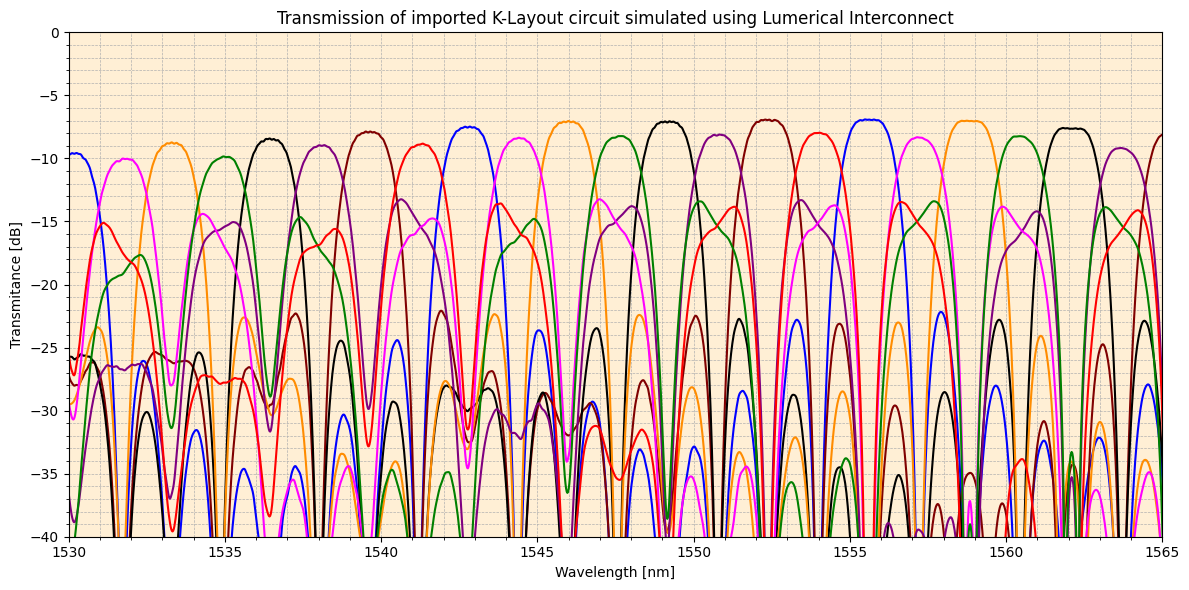

In [30]:
plt.figure(figsize=(12,6))
plt.plot(data1['wavelength']/nm, data1['TE gain (dB)'],color='blue')
plt.plot(data2['wavelength']/nm, data2['TE gain (dB)'], color='maroon')
plt.plot(data3['wavelength']/nm, data3['TE gain (dB)'], color='black')
plt.plot(data4['wavelength']/nm, data4['TE gain (dB)'], color='darkorange')
plt.plot(data5['wavelength']/nm, data5['TE gain (dB)'], color='purple')
plt.plot(data6['wavelength']/nm, data6['TE gain (dB)'], color='magenta')
#plt.plot(data7['wavelength']/nm, data7['TE gain (dB)'], color='pink', linestyle='--') # repeated
plt.plot(data8['wavelength']/nm, data8['TE gain (dB)'], color='green')
plt.plot(data9['wavelength']/nm, data9['TE gain (dB)'], color='red')
plt.xlim(1530, 1565)
plt.grid()
plt.ylim(-40, 0)
plt.xlabel('Wavelength [nm]')
plt.ylabel('Transmitance [dB]')
plt.minorticks_on()
plt.title('Transmission of imported K-Layout circuit simulated using Lumerical Interconnect')
plt.tight_layout()
plt.grid(which='both', axis='both', linestyle='--', linewidth=0.5)
ax = plt.gca()
ax.set_facecolor('papayawhip')
plt.savefig('.\\Images\\Results from interconnect')

In [31]:
icApi.close()